# Prediction of a songs genre based on industrial metrics on Spotify 
Modern audio distribution services like spotify provide more than 100 million songs to users. In attempt to create unambigous plaulists for users, these services create many playlists for each genre. In our project, we will classify songs using the K-nearest neighbor algorithm into 4 subgroups of Rock, R&B, Pop and Rap. The metrics we will use to make such predictions are:
- Liveness: Detects presence of audience in the recording and acts as a confidence measure for wether the song was performed live or not.
- Daceability: Considers tempo, rythm, stability, beat strength and overall regularity to measure how suitable a track is for dancing.
- Valence: Measure of musical positiveness.
- Acousticness: Confidence measure of wether a track is acoustic or not.
- Speechiness: The ratio of speech presence in a track.
- Loudness: The overall loudness of a track in decibels scaled to be between 0 and 1 from -60 to 0 db.
In the exploratory seciton we shall look at the distribution of these charecteristics for each category to see if a noticable difference that can be exploited by our algorithm exists.

In [1]:
library(tidyverse)
library(dplyr)
library(stringr)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:

# Get training data
# Keeping only genres of pop, rap, rock and r&b.
spotify_tracks <- read_csv("data/spotify_songs.csv") |> 
    filter(playlist_genre != "latin" , playlist_genre != "edm")

#Selecting predictors
spotify_char <- spotify_tracks |> 
    select("playlist_genre","danceability","liveness","valence","acousticness","speechiness","loudness", "tempo") 

# Round the factors to visualize graphs (without this would be hard to see)
spotify_char <- spotify_char |>
    mutate_at(vars(-playlist_genre), funs(round(., 2)))

spotify_char

## comparing artists

Rows: 32833 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): track_id, track_name, track_artist, track_album_id, track_album_na...
dbl (13): track_popularity, danceability, energy, key, loudness, mode, speec...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


playlist_genre danceability liveness valence acousticness speechiness
1     pop            0.75         0.07     0.52    0.10         0.06       
2     pop            0.73         0.36     0.69    0.07         0.04       
3     pop            0.68         0.11     0.61    0.08         0.07       
4     pop            0.72         0.20     0.28    0.03         0.10       
5     pop            0.65         0.08     0.72    0.08         0.04       
6     pop            0.68         0.14     0.58    0.08         0.13       
7     pop            0.45         0.18     0.15    0.19         0.06       
8     pop            0.54         0.11     0.37    0.03         0.04       
9     pop            0.59         0.64     0.37    0.02         0.06       
10    pop            0.64         0.09     0.59    0.06         0.03       
11    pop            0.68         0.12     0.75    0.15         0.18       
12    pop            0.44         0.13     0.33    0.15         0.06       
13    pop            0.74         0.37     0.69    0.04         0.05       
14    pop            0.57         0.34     0.68    0.01         0.06       
15    pop            0.69         0.07     0.24    0.01         0.06       
16    pop            0.80         0.36     0.72    0.13         0.09       
17    pop            0.69         0.43     0.37    0.07         0.09       
18    pop            0.68         0.17     0.52    0.04         0.16       
19    pop            0.75         0.14     0.32    0.10         0.05       
20    pop            0.47         0.13     0.23    0.01         0.09       
21    pop            0.57         0.10     0.20    0.00         0.04       
22    pop            0.71         0.11     0.71    0.09         0.03       
23    pop            0.68         0.12     0.34    0.05         0.13       
24    pop            0.73         0.04     0.37    0.11         0.04       
25    pop            0.62         0.40     0.42    0.02         0.04       
26    pop            0.68         0.33     0.47    0.10         0.04       
27    pop            0.68         0.03     0.35    0.01         0.04       
28    pop            0.66         0.33     0.40    0.03         0.05       
29    pop            0.62         0.09     0.37    0.00         0.05       
30    pop            0.68         0.27     0.82    0.03         0.10       
⋮     ⋮              ⋮            ⋮        ⋮       ⋮            ⋮          
21606 r&b            0.77         0.07     0.94    0.04         0.05       
21607 r&b            0.30         0.90     0.22    0.28         0.04       
21608 r&b            0.58         0.11     0.36    0.48         0.04       
21609 r&b            0.58         0.11     0.24    0.88         0.05       
21610 r&b            0.41         0.09     0.28    0.05         0.03       
21611 r&b            0.39         0.08     0.31    0.08         0.05       
21612 r&b            0.51         0.14     0.49    0.70         0.03       
21613 r&b            0.46         0.12     0.66    0.72         0.03       
21614 r&b            0.65         0.13     0.40    0.74         0.03       
21615 r&b            0.50         0.08     0.30    0.88         0.03       
21616 r&b            0.56         0.66     0.38    0.56         0.11       
21617 r&b            0.48         0.12     0.51    0.46         0.12       
21618 r&b            0.33         0.23     0.12    0.08         0.07       
21619 r&b            0.55         0.09     0.48    0.09         0.05       
21620 r&b            0.23         0.38     0.31    0.24         0.03       
21621 r&b            0.67         0.22     0.56    0.12         0.04       
21622 r&b            0.39         0.28     0.20    0.21         0.08       
21623 r&b            0.42         0.09     0.08    0.37         0.04       
21624 r&b            0.40         0.41     0.43    0.19         0.08       
21625 r&b            0.51         0.11     0.51    0.54         0.05       
21626 r&b            0.50         0.46     0.59    0.2

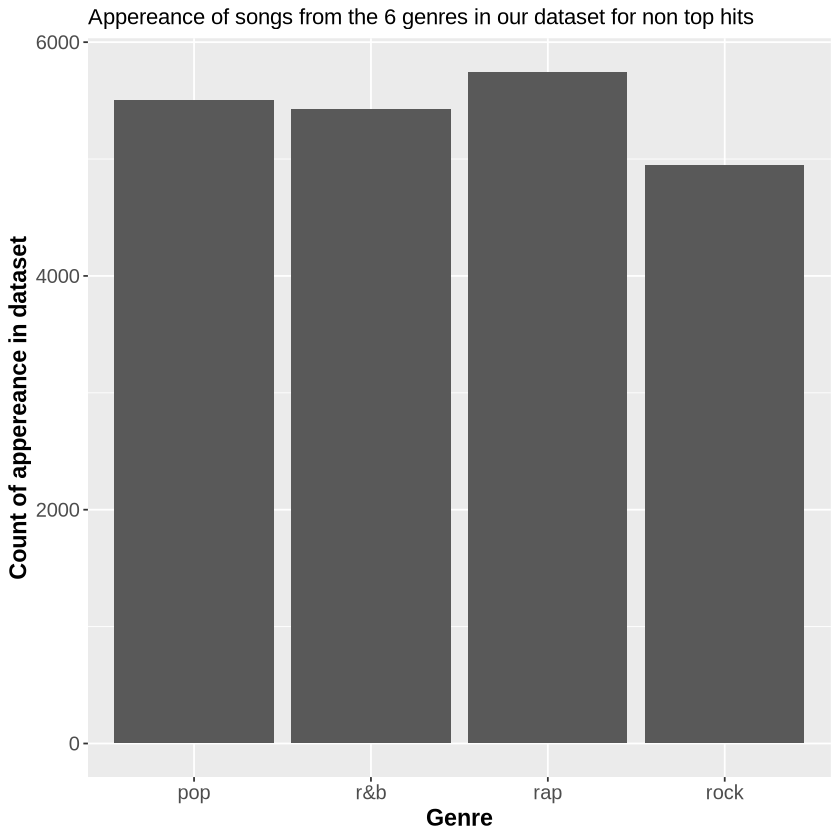

In [3]:
#Analyzing spread of the songs genres

genre_plot_non_hit <- ggplot(spotify_tracks,aes(x=playlist_genre)) + 
    geom_bar(stat="count") + 
    xlab("Genre") + 
    ylab("Count of appereance in dataset") + 
    ggtitle("Appereance of songs from the 6 genres in our dataset for non top hits") + 
    theme(axis.text=element_text(size=12),
        axis.title=element_text(size=14,face="bold"))

genre_plot_non_hit

As can be seen above, distribution of the genres in our non-top hits dataset is adequate for a satisfactory analysis. Now we shall see the distribution of our predictors for each cateogry.


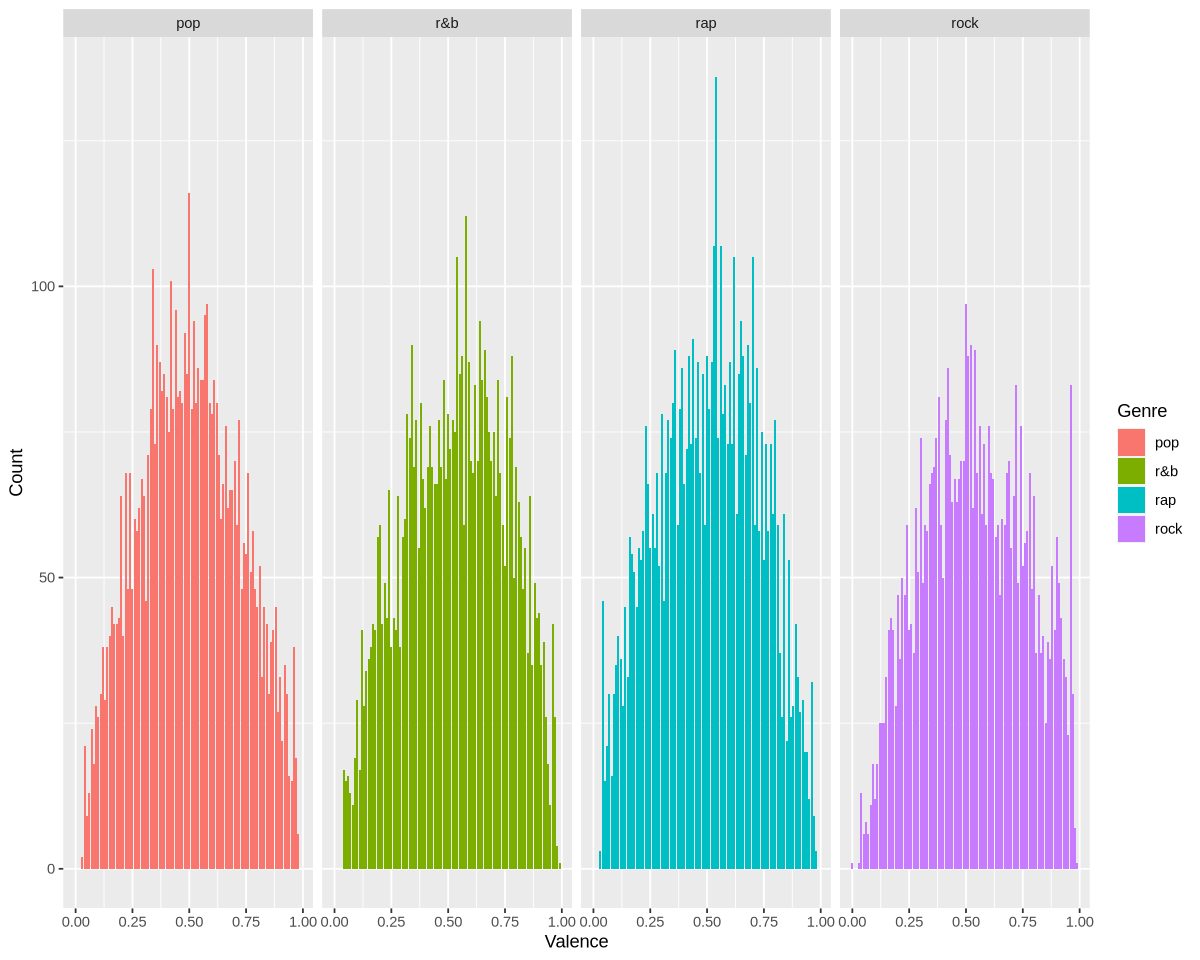

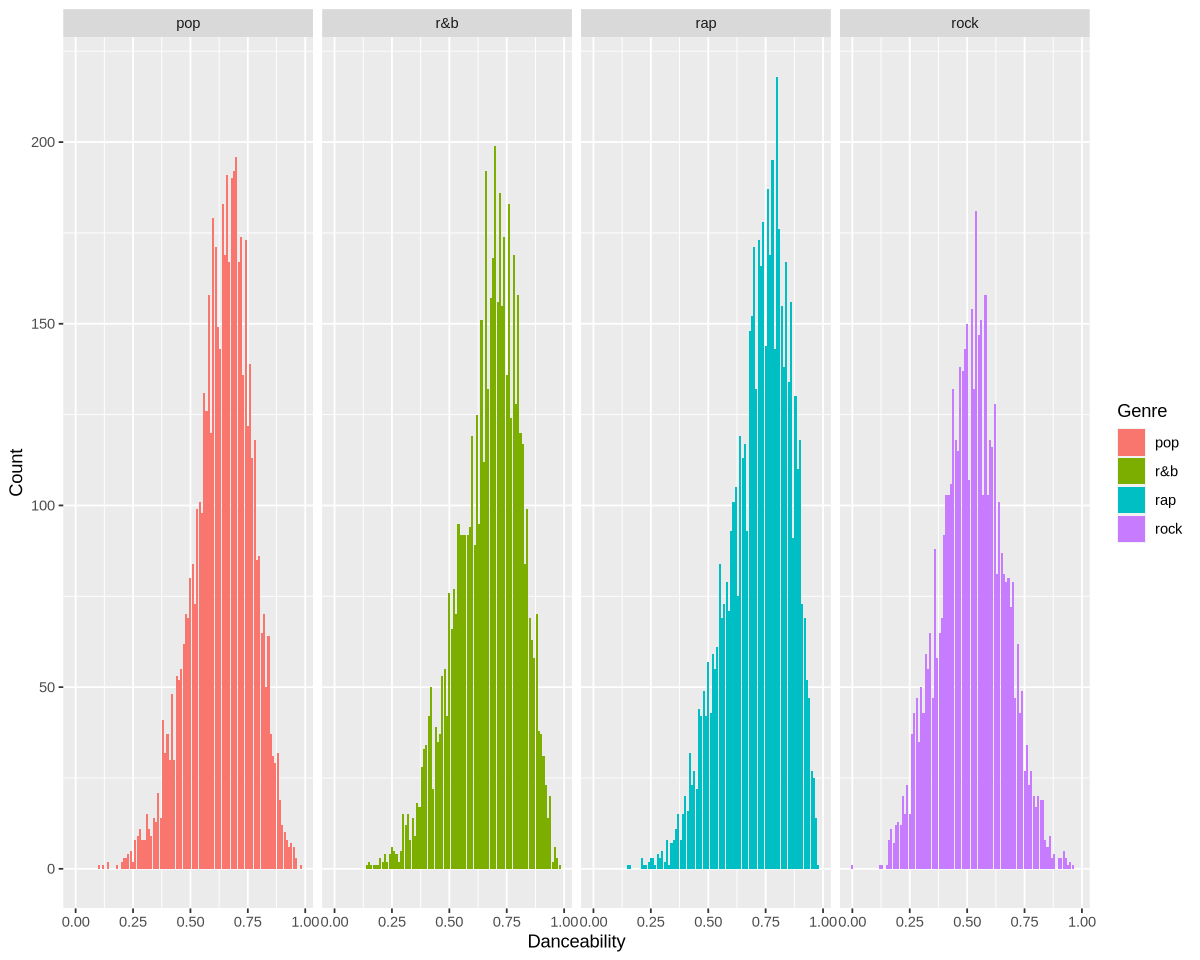

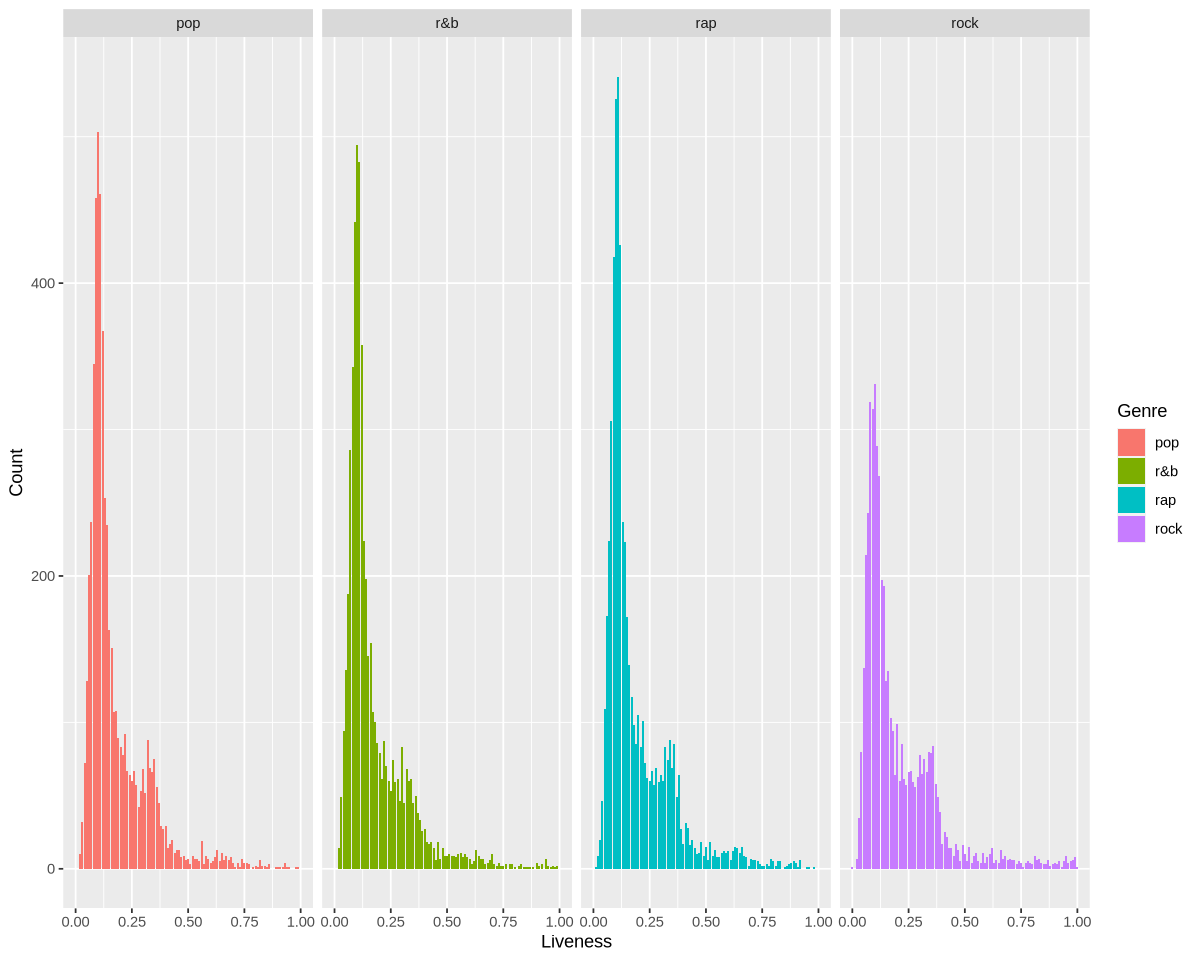

Warning message:
“Removed 3956 rows containing non-finite values (`stat_count()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_bar()`).”


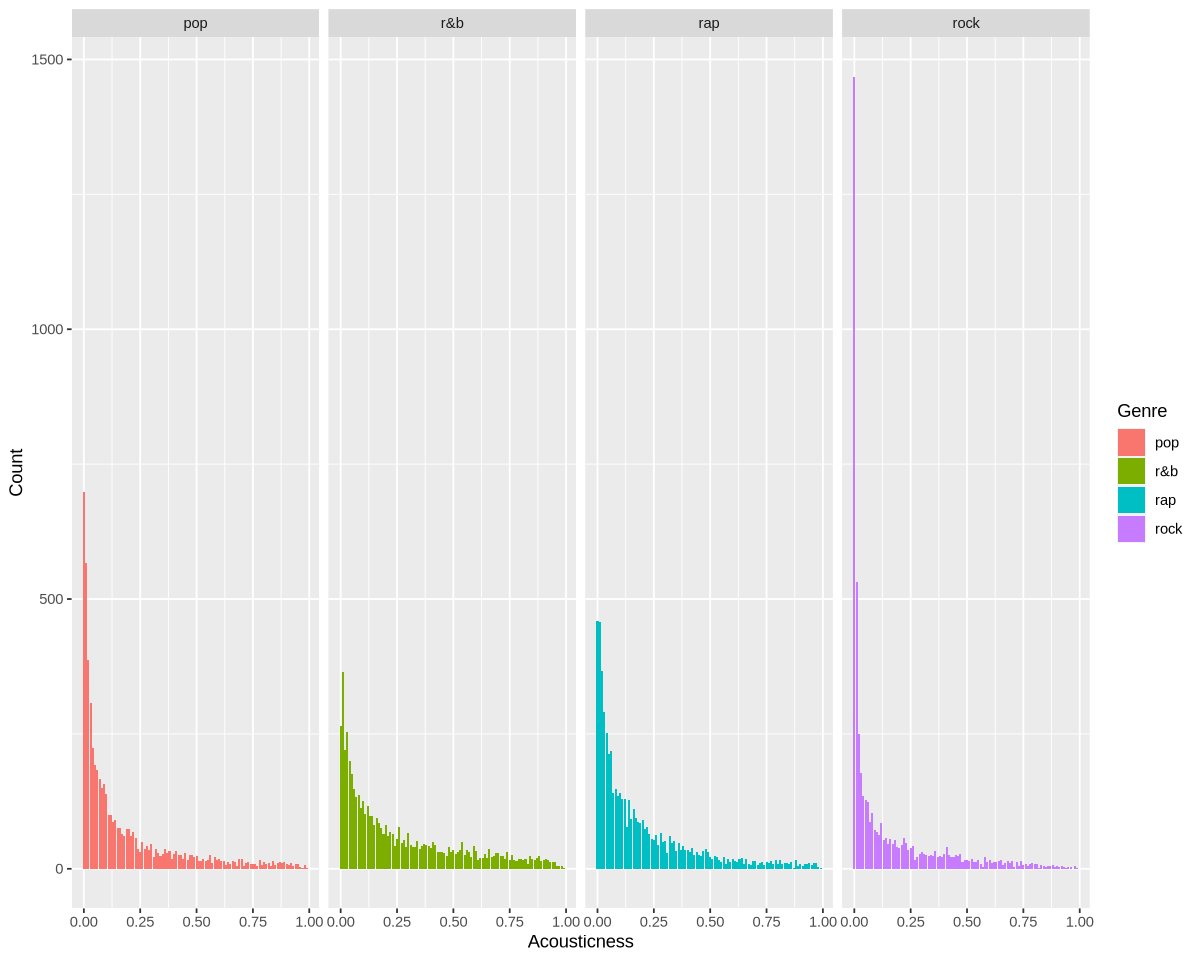

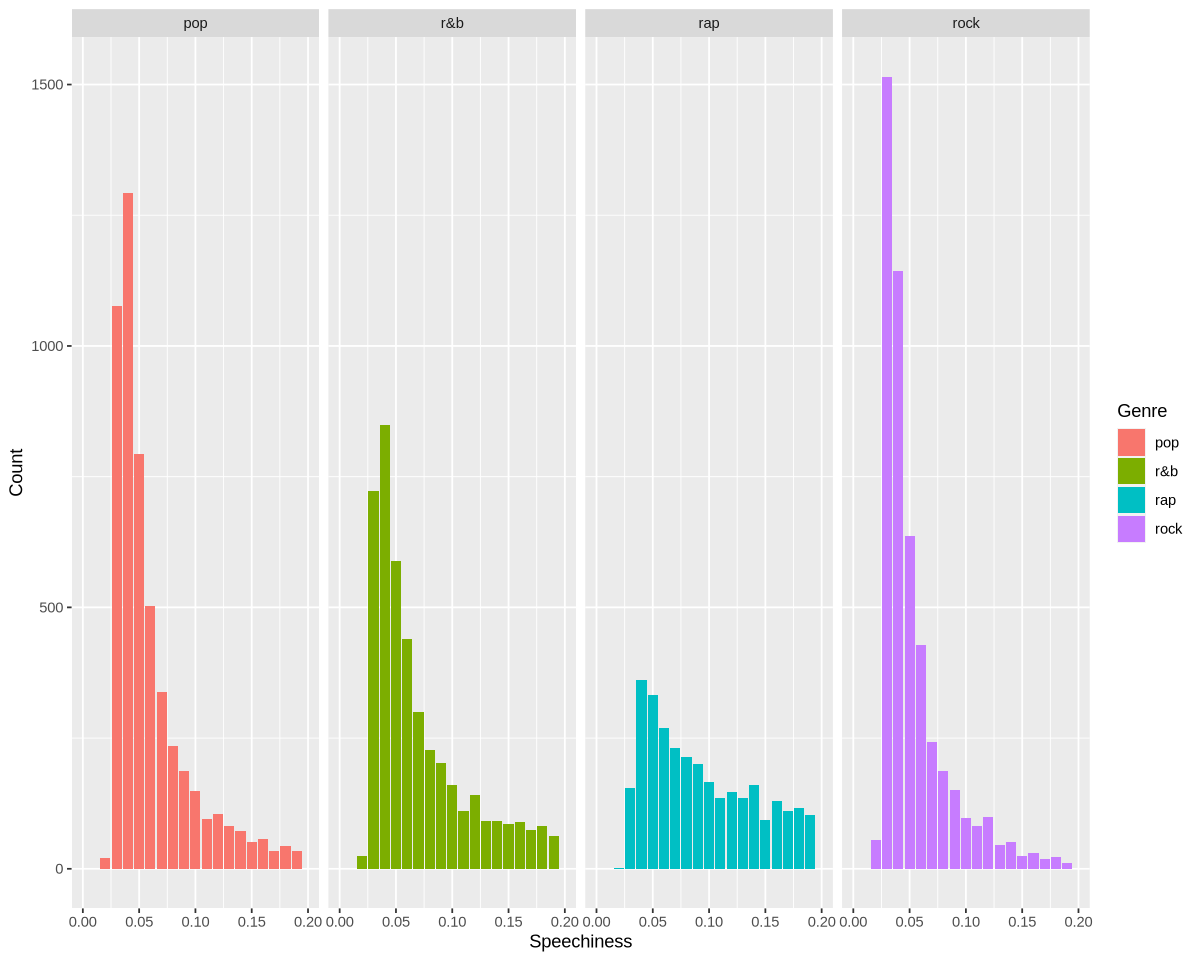

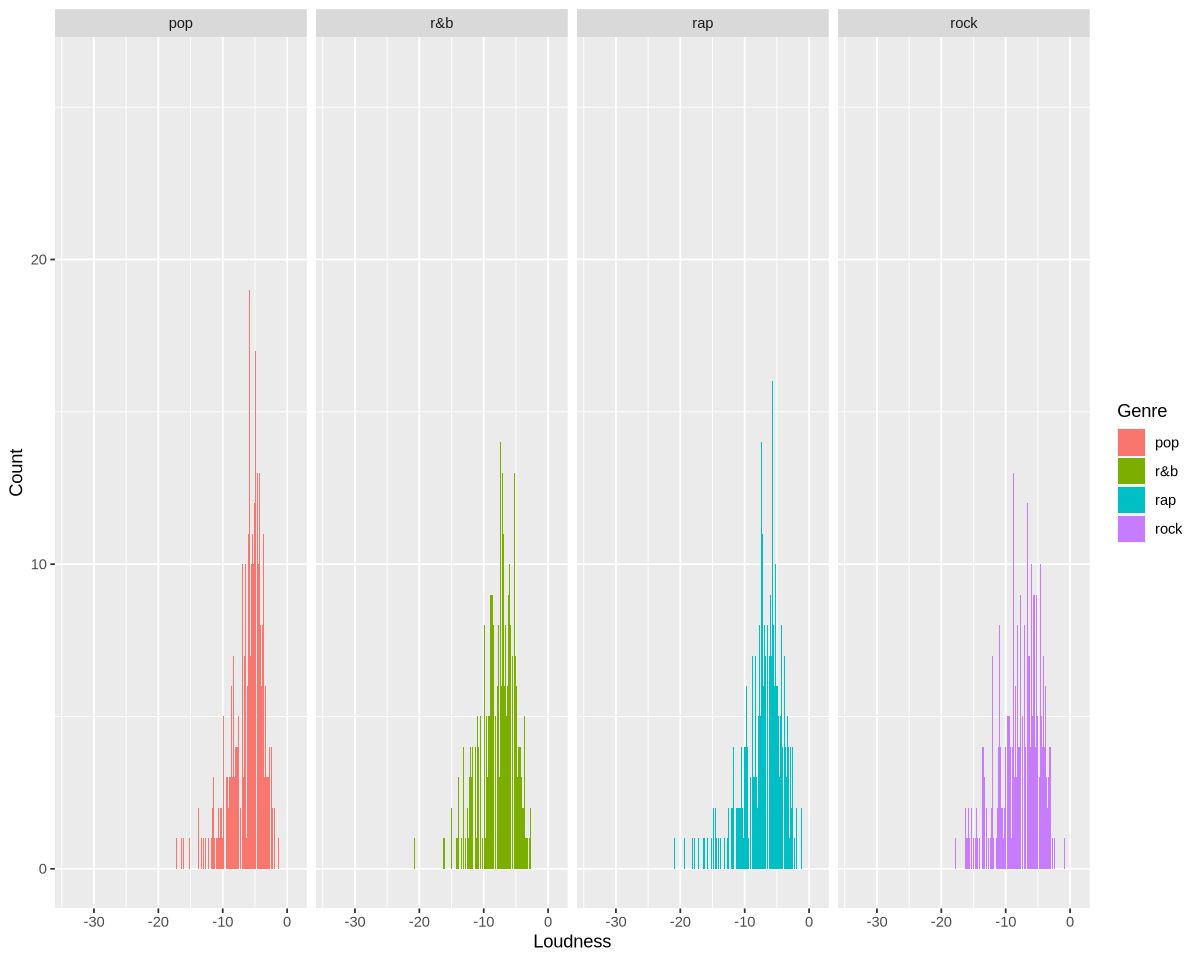

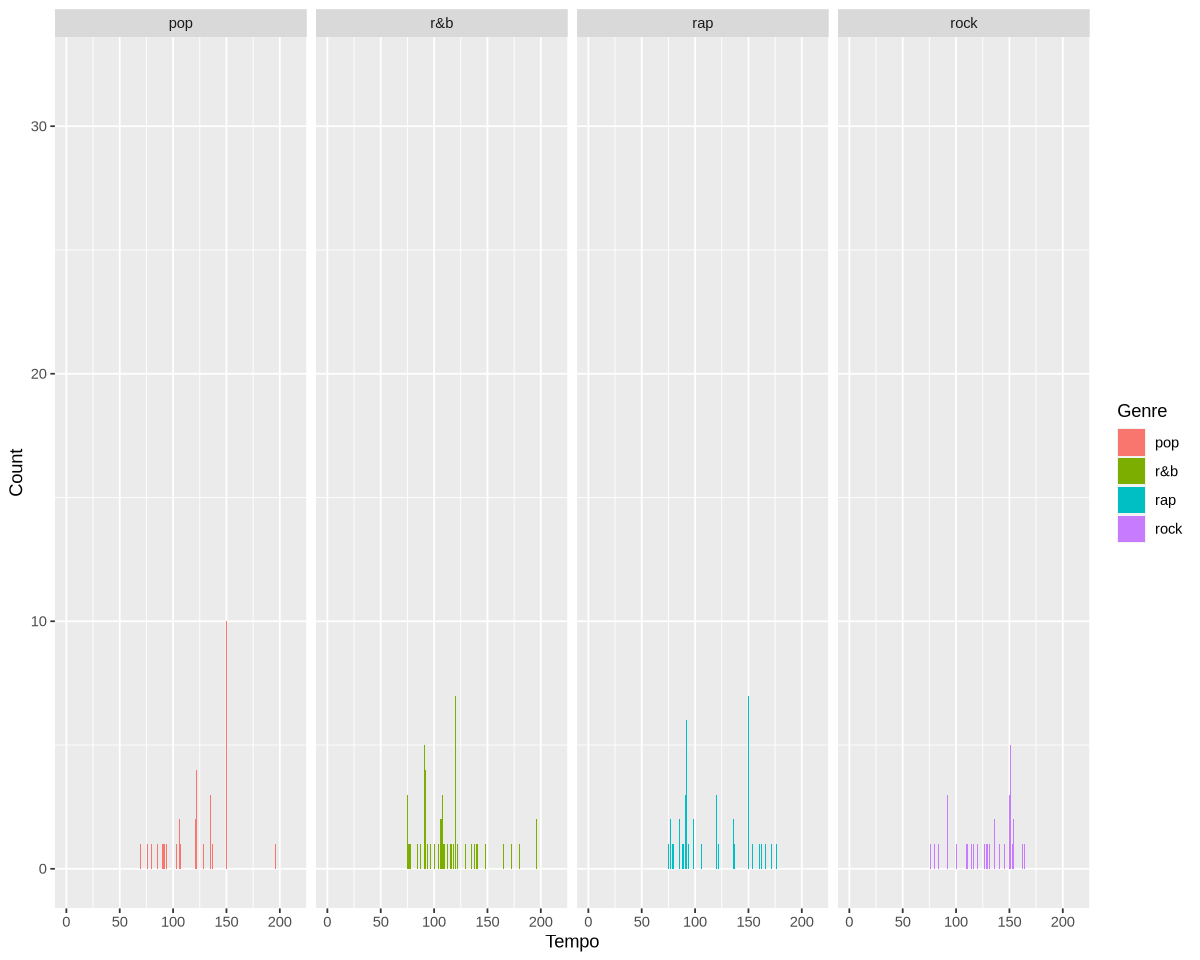

In [4]:
options(repr.plot.width = 10, repr.plot.height =8) 


valence_distributions <- ggplot(spotify_char,aes(x=valence,fill=playlist_genre)) +
    geom_bar(stat="count",alpha=1,position="dodge") +
    facet_grid(cols=vars(playlist_genre)) + 
    xlab("Valence") + 
    ylab("Count") + 
    labs(fill="Genre")

dance_distribution <- ggplot(spotify_char,aes(x=danceability,fill=playlist_genre)) +
    geom_bar(stat="count",alpha=1) +
    facet_grid(cols=vars(playlist_genre))  + 
    xlab("Danceability") + 
    ylab("Count") + 
    labs(fill="Genre")
live_distribution <- ggplot(spotify_char,aes(x=liveness,fill=playlist_genre)) + 
        geom_bar(stat="count",alpha=1) +
    facet_grid(cols=vars(playlist_genre))  + 
    xlab("Liveness") + 
    ylab("Count") + 
    labs(fill="Genre")
acoust_distribution <- ggplot(spotify_char,aes(x=acousticness,fill=playlist_genre)) + 
        geom_bar(stat="count",alpha=1) +
    facet_grid(cols=vars(playlist_genre))  + 
    xlab("Acousticness") + 
    ylab("Count") + 
    labs(fill="Genre")

speech_distribution <- ggplot(spotify_char,aes(x=speechiness,fill=playlist_genre)) + 
        geom_bar(stat="count",alpha=1) +
    facet_grid(cols=vars(playlist_genre))  + 
    xlab("Speechiness") + 
    ylab("Count") + 
    labs(fill="Genre") + 
    scale_x_continuous(limits=c(0,0.2))

loud_distribution <-  ggplot(spotify_char,aes(x=loudness,fill=playlist_genre)) + 
        geom_bar(stat="count",alpha=1) +
    facet_grid(cols=vars(playlist_genre))  + 
    xlab("Loudness") + 
    ylab("Count") + 
    labs(fill="Genre")

tempo_distribution <-  ggplot(spotify_char,aes(x=tempo,fill=playlist_genre)) + 
        geom_bar(stat="count",alpha=1) +
    facet_grid(cols=vars(playlist_genre))  + 
    xlab("Tempo") + 
    ylab("Count") + 
    labs(fill="Genre")


valence_distributions
dance_distribution
live_distribution
acoust_distribution
speech_distribution
loud_distribution
tempo_distribution

In [5]:
spotify_tracks_means <- spotify_tracks |>
summarize(tempo_mean = mean(tempo),
          danceability_mean = mean(danceability),
          liveness_mean = mean(liveness),
          valence_mean = mean(valence),
          acousticness_mean = mean(acousticness),
          speechiness_mean = mean(acousticness),
          loudness_mean = mean(loudness))
spotify_tracks_means

spotify_tracks_popular <- spotify_tracks |>
arrange(-track_popularity)
spotify_tracks_popular

tempo_mean danceability_mean liveness_mean valence_mean acousticness_mean
1 120.0543   0.640872          0.1863955     0.5186356    0.1930627        
  speechiness_mean loudness_mean
1 0.1930627        -7.188814

track_id               track_name                     
1     2XU0oxnq2qxCpomAAuJY8K Dance Monkey                   
2     696DnlkuDOXcMAnKlTgXXK ROXANNE                        
3     696DnlkuDOXcMAnKlTgXXK ROXANNE                        
4     7k4t7uLgtOxPwTpFmtJNTY Tusa                           
5     2b8fOow8UzyDFAE27YhOZM Memories                       
6     0sf12qNH5qcw8qpgymFOqD Blinding Lights                
7     2b8fOow8UzyDFAE27YhOZM Memories                       
8     21jGcNKet2qwijlDFuPiPb Circles                        
9     0sf12qNH5qcw8qpgymFOqD Blinding Lights                
10    0sf12qNH5qcw8qpgymFOqD Blinding Lights                
11    0nbXyq5TXYPCO7pr3N8S4I The Box                        
12    0nbXyq5TXYPCO7pr3N8S4I The Box                        
13    7k4t7uLgtOxPwTpFmtJNTY Tusa                           
14    0nbXyq5TXYPCO7pr3N8S4I The Box                        
15    0nbXyq5TXYPCO7pr3N8S4I The Box                        
16    2b8fOow8UzyDFAE27YhOZM Memories                       
17    0sf12qNH5qcw8qpgymFOqD Blinding Lights                
18    0sf12qNH5qcw8qpgymFOqD Blinding Lights                
19    0nbXyq5TXYPCO7pr3N8S4I The Box                        
20    7k4t7uLgtOxPwTpFmtJNTY Tusa                           
21    2b8fOow8UzyDFAE27YhOZM Memories                       
22    21jGcNKet2qwijlDFuPiPb Circles                        
23    3ZCTVFBt2Brf31RLEnCkWJ everything i wanted            
24    6WrI0LAC5M1Rw2MnX2ZvEg Don't Start Now                
25    3ZCTVFBt2Brf31RLEnCkWJ everything i wanted            
26    4TnjEaWOeW0eKTKIEvJyCa Falling                        
27    6WrI0LAC5M1Rw2MnX2ZvEg Don't Start Now                
28    3ZCTVFBt2Brf31RLEnCkWJ everything i wanted            
29    4TnjEaWOeW0eKTKIEvJyCa Falling                        
30    6WrI0LAC5M1Rw2MnX2ZvEg Don't Start Now                
⋮     ⋮                      ⋮                              
21606 4VtYY8IfgqIWZhJCz7eXYG Now I Get It (The Revelation)  
21607 4SWUAEniXOiGiwXYPAEiLV Manifest ( The Foundation)     
21608 13CLufSzf72lwWXJrEvzF7 Enjoy Ya Self                  
21609 4eX7melvFT67ywDZB7kw0V I Used to Love Him             
21610 1Gn9E97yfDAORWpqxbfGUX Rumours                        
21611 2xw83SYMla3pwGna8llGWi Cure                           
21612 7rWLRWfPsUzU6h7r71vlOM Constant Surprises             
21613 0g6NSuyHTmz4DLwoGt5Fil Sharpness                      
21614 6xpEVwTvW5KNqPQ7yFpq12 Ascension (Don't Ever Wonder)  
21615 2bmVKEPgeNj7qh7QsCQq7O Do You Feel The Way I Do       
21616 2o0QvvMoiq2zIQ1wWhqio9 Teach U a Lesson               
21617 69TENP7mK0C1Qxgi4dpsDp Sure Boy                       
21618 0q3q720x1nLY7QqRdeY5CW Nothing Even Matters           
21619 2semWw1jR12F5g2X3Iz7Qq You're My Baby                 
21620 6viJumjXFeskzT8HBjhMe9 You Know I'm No Good           
21621 5dSiEfe2Q5RLXXrsmjsMed Lifetime - Uncut               
21622 5l43cvpvx3zpInfzD6j2UL It's In The Mornin             
21623 4Pzzu5xpOc3e41d2M4MWxi Celebrate Tonight              
21624 59vcfBSy2Qa9Ytg1NdG9uo Unaware                        
21625 7e2lRhdJQ6vH4EwOrIMb4g Foreign Fields                 
21626 2sXnHk6Bvw3RByVMpbcc5A This Ain't the Way             
21627 4liHM874gKPYnsqmdOYBZA Syrup & Honey                  
21628 54VSZyIh7YdLujfihY0m5Y A Change Is Gonna Come         
21629 2gWQa5iZr3gHkJy8BOuQJW I Found A Love - Single Version
21630 3NFMM7IW7Mpk8t3ykUC8nQ Once                           
21631 0BN9Ray5nJxg1hWhPTY3ka The High Road                  
21632 16VvTsMS2Uj0f4vnIILYu8 Let My Love                    
21633 4DTLlMqz8grnPEQZL0DzfE Summertime                     
21634 2kAwRhYlFuUTqhdeeWdzyO You                            
21635 5WyXvvsfowvKUtPI4biVlM Love Came Here                 
      track_artist         track_popularity track_album_id        
1     Tones and I          100              0UywfDKYlyiu1b38DRrzYD
2     Arizona Zervas        99              6HJDrXs0hpebaRFKA1sF90
3     Arizona Zervas   